In [1]:
# Exploratory Data Analysis

In [1]:
# attempt methods from the EcoG seizure prediction challenge
import numpy as np
import pandas as pd
import joblib
import os
import mne
import time
from mne.externals.pymatreader import read_mat
from collections import OrderedDict
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib qt

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

%run funcs.ipynb

In [19]:
# Import first subject data (consider using moabb)
# samples in each trial ( 2 seconds at 250Hz)
# LPF at 40Hz

# X1,y1,ep = load_dat(1,1,True)
# print(X1.shape,y1.shape)
# print(type(ep))
# print(ep)

In [2]:
# get the epochs data of first subject first trial
cwd = os.getcwd()
data_path = cwd

sub_n= 0
session_n = 0

epochs = {}
diff = ['MATBeasy', 'MATBmed', 'MATBdiff']
for lab_idx, level in enumerate(diff):
    sub = 'P{0:02d}'.format(sub_n+1)
    sess = f'S{session_n+1}'
    path = os.path.join(os.path.join(data_path, sub), sess) + f'/eeg/alldata_sbj{str(sub_n+1).zfill(2)}_sess{session_n+1}_{level}.set'
    # Read the epoched data with MNE
    epochs[lab_idx] = mne.io.read_epochs_eeglab(path, verbose=False)
    # You could add some pre-processing here with MNE

In [3]:
# first subject second session
cwd = os.getcwd()
data_path = cwd

sub_n= 0
session_n = 1

epochs1 = {}
diff = ['MATBeasy', 'MATBmed', 'MATBdiff']
for lab_idx, level in enumerate(diff):
    sub = 'P{0:02d}'.format(sub_n+1)
    sess = f'S{session_n+1}'
    path = os.path.join(os.path.join(data_path, sub), sess) + f'/eeg/alldata_sbj{str(sub_n+1).zfill(2)}_sess{session_n+1}_{level}.set'
    # Read the epoched data with MNE
    epochs1[lab_idx] = mne.io.read_epochs_eeglab(path, verbose=False)

In [22]:
print(epochs.keys())
for i in epochs.keys():
    print(i)
    print(epochs[i].info)

dict_keys([0, 1, 2])
0
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, CP5, CP1, Pz, P3, P7, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 61 items (61 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 250.0 Hz
>
1
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, CP5, CP1, Pz, P3, P7, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 61 items (61 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 250.0 Hz
>
2
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, CP5, CP1, Pz, P3, P7, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 61 items (61 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 250.0 Hz
>


In [6]:
# create the erps or evoked potentials. averaged across epochs per condition
ev = []
for i in epochs.keys():
    ev.append(epochs[i].average())
    
ev1 = []
for i in epochs1.keys():
    ev1.append(epochs1[i].average())

In [7]:
# topomap of the erp created (ev)

times = np.arange(0,2,0.195)
fig, ax = plt.subplots(3,12,gridspec_kw=dict(width_ratios=[5]*11+[1]))
plt.suptitle("Sub1 Sess1 averaged across epochs per condition")
for i in range(3):
    ev[i].plot_topomap(times,axes = ax[i,:])
plt.tight_layout()
plt.show()

times = np.arange(0,2,0.195)
fig, ax = plt.subplots(3,12,gridspec_kw=dict(width_ratios=[5]*11+[1]))
plt.suptitle("Sub1 Sess2 averaged across epochs per condition")
for i in range(3):
    ev1[i].plot_topomap(times,axes = ax[i,:])
plt.tight_layout()
plt.show()

In [12]:
# visualise using topoplot with sensor locations s1s1 t1

times = np.arange(0,1,0.19)
print(times)
# epochs.plot_topomap(times, ch_type='eeg', time_unit='s')
# print(epochs.info)
# epochs.get_montage()
# epochs.plot_image()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


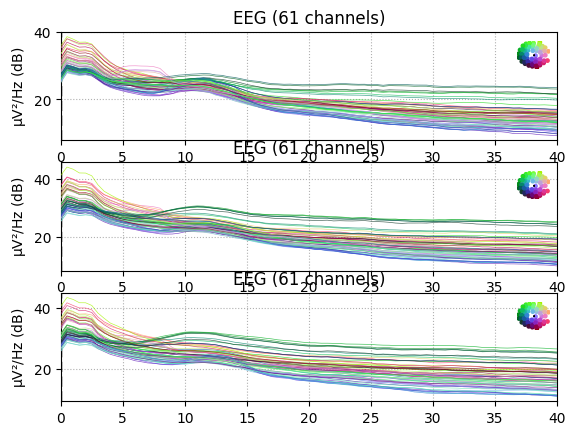

In [14]:
#freq map per channel averaged across time and trial - this averages across epochs
fig,axes = plt.subplots(nrows=3,ncols=1)
epochs[0].plot_psd(fmin=0,fmax=40,ax=axes[0])
epochs[1].plot_psd(fmin=0,fmax=40,ax=axes[1])
epochs[2].plot_psd(fmin=0,fmax=40,ax=axes[2])

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


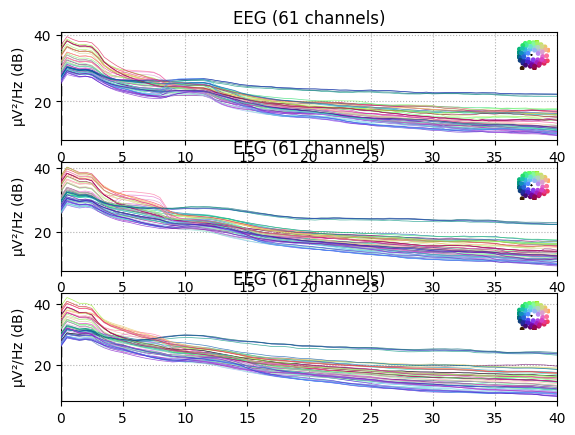

In [15]:
fig1,axes1 = plt.subplots(nrows=3,ncols=1)
epochs1[0].plot_psd(fmin=0,fmax=40,ax=axes1[0])
epochs1[1].plot_psd(fmin=0,fmax=40,ax=axes1[1])
epochs1[2].plot_psd(fmin=0,fmax=40,ax=axes1[2])

In [11]:
# plot the freq map for each of the condition separately
epochs1

{0: <EpochsEEGLAB |  149 events (all good), 0 - 1.996 sec, baseline off, ~34.8 MB, data loaded,
  'MATBeasy': 149>,
 1: <EpochsEEGLAB |  149 events (all good), 0 - 1.996 sec, baseline off, ~34.8 MB, data loaded,
  'MATBmed': 149>,
 2: <EpochsEEGLAB |  149 events (all good), 0 - 1.996 sec, baseline off, ~34.8 MB, data loaded,
  'MATBdiff': 149>}

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


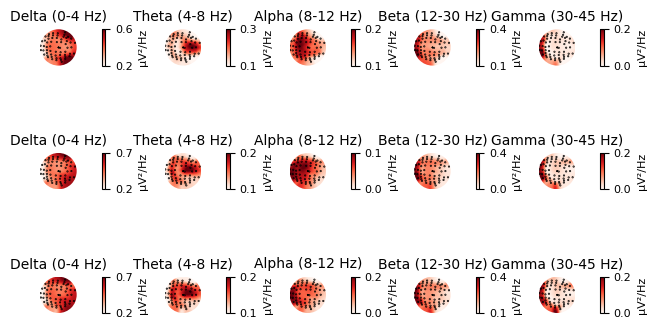

In [18]:
fig2,axes2 = plt.subplots(nrows=3,ncols=5)
epochs[0].plot_psd_topomap(normalize = True,axes=axes2[0])
epochs[1].plot_psd_topomap(normalize = True,axes=axes2[1])
epochs[2].plot_psd_topomap(normalize = True,axes=axes2[2])

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


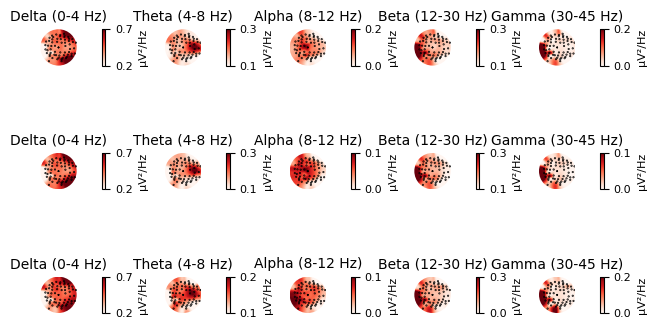

In [20]:
fig3,axes3 = plt.subplots(nrows=3,ncols=5)
epochs1[0].plot_psd_topomap(normalize = True,axes=axes3[0])
epochs1[1].plot_psd_topomap(normalize = True,axes=axes3[1])
epochs1[2].plot_psd_topomap(normalize = True,axes=axes3[2])

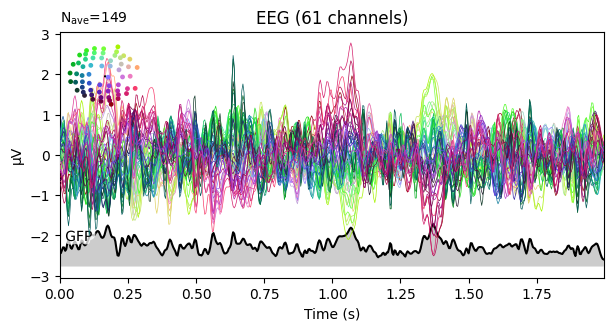

In [26]:
ev[0].plot(spatial_colors=True, gfp=True)

In [21]:
mne.viz.plot_compare_evokeds(ev)

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


[<Figure size 800x600 with 1 Axes>]

In [22]:
# get the epochs data of first subject first trial
cwd = os.getcwd()
data_path = cwd

sub_n= 1
session_n = 0

epochs10 = {}
diff = ['MATBeasy', 'MATBmed', 'MATBdiff']
for lab_idx, level in enumerate(diff):
    sub = 'P{0:02d}'.format(sub_n+1)
    sess = f'S{session_n+1}'
    path = os.path.join(os.path.join(data_path, sub), sess) + f'/eeg/alldata_sbj{str(sub_n+1).zfill(2)}_sess{session_n+1}_{level}.set'
    # Read the epoched data with MNE
    epochs10[lab_idx] = mne.io.read_epochs_eeglab(path, verbose=False)
    # You could add some pre-processing here with MNE

In [23]:
# get the epochs data of first subject first trial
cwd = os.getcwd()
data_path = cwd

sub_n= 1
session_n = 1

epochs11 = {}
diff = ['MATBeasy', 'MATBmed', 'MATBdiff']
for lab_idx, level in enumerate(diff):
    sub = 'P{0:02d}'.format(sub_n+1)
    sess = f'S{session_n+1}'
    path = os.path.join(os.path.join(data_path, sub), sess) + f'/eeg/alldata_sbj{str(sub_n+1).zfill(2)}_sess{session_n+1}_{level}.set'
    # Read the epoched data with MNE
    epochs11[lab_idx] = mne.io.read_epochs_eeglab(path, verbose=False)
    # You could add some pre-processing here with MNE

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


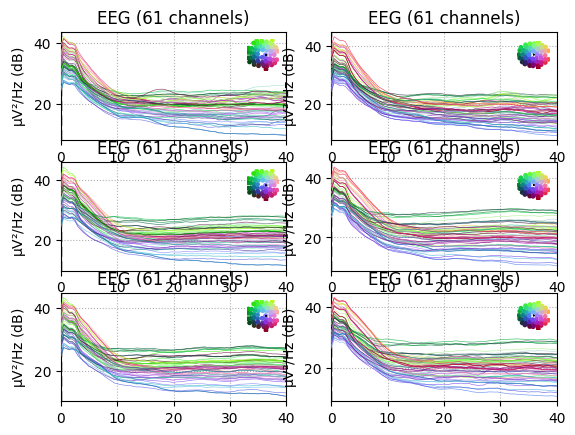

In [24]:
#freq map per channel averaged across time and trial - this averages across epochs
fig,axes = plt.subplots(nrows=3,ncols=2)
epochs10[0].plot_psd(fmin=0,fmax=40,ax=axes[0,0])
epochs10[1].plot_psd(fmin=0,fmax=40,ax=axes[1,0])
epochs10[2].plot_psd(fmin=0,fmax=40,ax=axes[2,0])

#freq map per channel averaged across time and trial - this averages across epochs
epochs11[0].plot_psd(fmin=0,fmax=40,ax=axes[0,1])
epochs11[1].plot_psd(fmin=0,fmax=40,ax=axes[1,1])
epochs11[2].plot_psd(fmin=0,fmax=40,ax=axes[2,1])

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


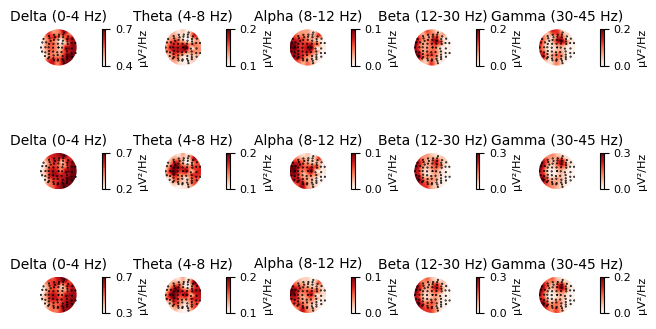

In [25]:
fig2,axes2 = plt.subplots(nrows=3,ncols=5)
epochs10[0].plot_psd_topomap(normalize = True,axes=axes2[0])
epochs10[1].plot_psd_topomap(normalize = True,axes=axes2[1])
epochs10[2].plot_psd_topomap(normalize = True,axes=axes2[2])

fig2,axes2 = plt.subplots(nrows=3,ncols=5)
epochs11[0].plot_psd_topomap(normalize = True,axes=axes2[0])
epochs11[1].plot_psd_topomap(normalize = True,axes=axes2[1])
epochs11[2].plot_psd_topomap(normalize = True,axes=axes2[2])